In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from emocoder.src import utils, constants
from emocoder.experiments import constants as xconstants

In [2]:
acl_columnwidth_in_inch = 7.7 / 2.54

In [3]:
split = "test"  # dev or test

In [4]:
baseline =pd.read_csv(xconstants.IMAGE_BASELINE_BASEPATH / split /"overview.csv", index_col=0)
baseline["mean"] = baseline[["acc", "valence", "arousal", "dominance"]].mean(axis=1)
baseline.rename(inplace=True, index={"you2017_baseline": "you2017", "iaps_baseline": "iaps", 
                                     "fer2013vad_baseline": "fer_vad", "fer2013_be_baseline": "fer_be", 
                                     "affectnet_va_baseline": "affectnet_va", 
                                     "affectnet_be_baseline": "affectnet_be"})
baseline

,acc,valence,arousal,dominance,mean
fer_vad,NaN,0.859843,0.818968,0.775917,0.818243
fer_be,0.704253,NaN,NaN,NaN,0.704253
affectnet_va,NaN,0.587996,0.529920,NaN,0.558958
affectnet_be,0.509073,NaN,NaN,NaN,0.509073


In [5]:
proposed = pd.read_csv(xconstants.IMAGE_PROPOSED_BASEPATH / split /"overview.csv", index_col=0)
proposed["mean"] = proposed[["acc", "valence", "arousal", "dominance"]].mean(axis=1)
proposed

,acc,valence,arousal,dominance,mean
fer_vad,NaN,0.858369,0.811139,0.772681,0.814063
fer_be,0.643816,NaN,NaN,NaN,0.643816
affectnet_va,NaN,0.588796,0.550881,NaN,0.569839
affectnet_be,0.496472,NaN,NaN,NaN,0.496472


In [6]:
augmented = pd.read_csv(xconstants.IMAGE_AUGMENTED_BASEPATH / split /"overview.csv", index_col=0)
augmented["mean"] = augmented[["acc", "valence", "arousal", "dominance"]].mean(axis=1)
augmented

,acc,valence,arousal,dominance,mean
fer_vad,NaN,0.898966,0.865891,0.835303,0.866720
fer_be,0.658366,NaN,NaN,NaN,0.658366
affectnet_va,NaN,0.588393,0.563776,NaN,0.576084
affectnet_be,0.490423,NaN,NaN,NaN,0.490423


In [7]:
if split == "dev":
    multitask = pd.read_csv(xconstants.IMAGE_MULTITASK_BASEPATH / split /"overview.csv", index_col=[0,1])
    multitask.drop(inplace=True, columns="mean")
    multitask["mean"] = multitask.mean(axis=1)
    multitask = multitask.sum(axis=0, level=1)
    multitask.drop(inplace=True, index="overall_mean")
    multitask.rename(inplace=True, index={"FER2013": "fer_be", "FER2013Vad": "fer_vad", 
                                          "AffectNet2019_BE": "affectnet_be", "AffectNet2019_VA": "affectnet_va"})
if split == "test":
    multitask = pd.read_csv(xconstants.IMAGE_MULTITASK_BASEPATH / split /"overview.csv", index_col=[0])
    multitask.index = ["fer_be", "fer_vad", "affectnet_be", "affectnet_va"]
    multitask["mean"] = multitask.mean(axis=1)
multitask

,acc,valence,arousal,dominance,mean
fer_be,0.562675,NaN,NaN,NaN,0.562675
fer_vad,NaN,0.793748,0.765346,0.676225,0.745107
affectnet_be,0.476815,NaN,NaN,NaN,0.476815
affectnet_va,NaN,0.588134,0.541194,NaN,0.564664


In [8]:
zeroshotbaseline = pd.read_csv(xconstants.IMAGE_ZEROSHOTBASELINE_BASEPATH / split / "overview.csv", index_col=0)
zeroshotbaseline["mean"] = zeroshotbaseline[["acc", "valence", "arousal", "dominance"]].mean(axis=1)
zeroshotbaseline.rename(inplace=True, index={"fer_vad_be": "fer_be",
                                             "fer_be_vad": "fer_vad", 
                                             "affectnet_va_be": "affectnet_be", 
                                             "affectnet_be_va": "affectnet_va"})
zeroshotbaseline

,acc,valence,arousal,dominance,mean
fer_be,0.538332,NaN,NaN,NaN,0.538332
fer_vad,NaN,0.848854,0.761609,0.740093,0.783519
affectnet_be,0.386593,NaN,NaN,NaN,0.386593
affectnet_va,NaN,0.567889,0.115699,NaN,0.341794


In [9]:
zeroshot = pd.read_csv(xconstants.IMAGE_ZEROSHOT_BASEPATH / split / "overview.csv", index_col=0)
zeroshot["mean"] = zeroshot[["acc", "valence", "arousal", "dominance"]].mean(axis=1)
zeroshot.rename(inplace=True, index={"fer_va_be": "fer_be",
                                     "fer_be_va": "fer_vad", 
                                     "affectnet_va_be": "affectnet_be", 
                                     "affectnet_be_va": "affectnet_va"})
zeroshot


,acc,valence,arousal,dominance,mean
fer_be,0.149972,NaN,NaN,NaN,0.149972
fer_vad,NaN,0.828848,0.591406,0.721616,0.713957
affectnet_be,0.247984,NaN,NaN,NaN,0.247984
affectnet_va,NaN,0.578566,0.135642,NaN,0.357104


In [10]:
augzero = pd.read_csv(xconstants.IMAGE_AUGZERO_BASEPATH / split / "overview.csv", index_col=0)
augzero["mean"] = augzero[["acc", "valence", "arousal", "dominance"]].mean(axis=1)
augzero.rename(inplace=True, index={"fer_va_be": "fer_be",
                                    "fer_be_va": "fer_vad", 
                                    "affectnet_va_be": "affectnet_be", 
                                    "affectnet_be_va": "affectnet_va"})
augzero

,acc,valence,arousal,dominance,mean
fer_be,0.634024,NaN,NaN,NaN,0.634024
fer_vad,NaN,0.86038,0.792076,0.770172,0.807543
affectnet_be,0.455645,NaN,NaN,NaN,0.455645
affectnet_va,NaN,0.59487,0.564684,NaN,0.579777


In [11]:
conditions = {"baseline": baseline, "proposed": proposed,  "augmented": augmented, "multitask": multitask, 
              "zeroshotbaseline": zeroshotbaseline, "zeroshot": zeroshot, "augzero": augzero}


In [12]:
outcome = pd.DataFrame({key: value["mean"] for key, value in conditions.items()})
outcome.columns = ["Bsl", "Sng", "Aug", "Mlt", "BsZ",  "SnZ", "AuZ"]
outcome = outcome.loc[["fer_be", "fer_vad", "affectnet_be", "affectnet_va"]]
outcome.loc["mean"] = outcome.mean(axis=0)
outcome

,Bsl,Sng,Aug,Mlt,BsZ,SnZ,AuZ
fer_be,0.704253,0.643816,0.658366,0.562675,0.538332,0.149972,0.634024
fer_vad,0.818243,0.814063,0.866720,0.745107,0.783519,0.713957,0.807543
affectnet_be,0.509073,0.496472,0.490423,0.476815,0.386593,0.247984,0.455645
affectnet_va,0.558958,0.569839,0.576084,0.564664,0.341794,0.357104,0.579777
mean,0.647632,0.631048,0.647898,0.587315,0.512560,0.367254,0.619247


In [13]:
print(outcome.round(3).to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} &    Bsl &    Sng &    Aug &    Mlt &    BsZ &    SnZ &    AuZ \\
\midrule
fer\_be       &  0.704 &  0.644 &  0.658 &  0.563 &  0.538 &  0.150 &  0.634 \\
fer\_vad      &  0.818 &  0.814 &  0.867 &  0.745 &  0.784 &  0.714 &  0.808 \\
affectnet\_be &  0.509 &  0.496 &  0.490 &  0.477 &  0.387 &  0.248 &  0.456 \\
affectnet\_va &  0.559 &  0.570 &  0.576 &  0.565 &  0.342 &  0.357 &  0.580 \\
mean         &  0.648 &  0.631 &  0.648 &  0.587 &  0.513 &  0.367 &  0.619 \\
\bottomrule
\end{tabular}



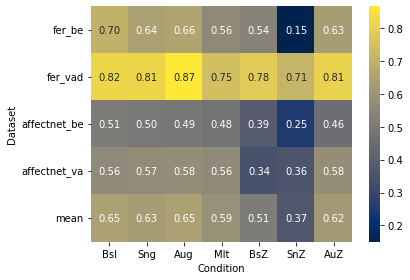

In [14]:
fig, ax = plt.subplots()
sns.heatmap(outcome, annot=True, cmap="cividis", fmt=".2f", ax=ax)
ax.set_xlabel("Condition")
ax.set_ylabel("Dataset")
fig.tight_layout()
fig.savefig("image-dev-results.pdf")

In [15]:
round(multitask - baseline, 2)

,acc,valence,arousal,dominance,mean
affectnet_be,-0.03,NaN,NaN,NaN,-0.03
affectnet_va,NaN,0.00,0.01,NaN,0.01
fer_be,-0.14,NaN,NaN,NaN,-0.14
fer_vad,NaN,-0.07,-0.05,-0.1,-0.07


In [16]:
round(augzero - zeroshotbaseline, 2)

,acc,valence,arousal,dominance,mean
fer_be,0.10,NaN,NaN,NaN,0.10
fer_vad,NaN,0.01,0.03,0.03,0.02
affectnet_be,0.07,NaN,NaN,NaN,0.07
affectnet_va,NaN,0.03,0.45,NaN,0.24


---